# Final Project

### How does the viewing experience differ at various big name cinemas?

### To what extent can the cinema environment effect the film viewing experience?

##### Data sources: Twitter, cinema review sites, film reviews, OMDB

#### The aim of this project will be to investigate if the environment can affect film veiwing experience and the what extent.  The reason for chosing this topic is to help inform a future project based around cinema hall environment design. After some initial research I have decided to combine official film reviews with public film reviews in various forms. This most efficient way to investigate this will be through numerical ratings as these are simpler to analyse patterns in, therefore I will collect various numerical ratings for films currently in cinema. To do this I will access:
#### OMDB API - a public API for the IMDB database allowing you to search for the full data for film titles including imbd ratings, meta score and imdb votes.
#### Odeon website - This contains numerical public ratings and public viewer text reviews, to extract these I will need to search through the website scrpit.
#### Cineworld website - This contains numerical public ratings for films currently in the cinema which will also have to be extracted through searching the website script.
#### Alongside the numerical rating comparison I hope to experiment with text data taken from both the odeon website and Twitter API, which provides a set of instantanious tweets. I hope through these sets of data to be able to recognise a pattern in film viewing institution and viewing experience.

# Twitter Data

#### A Twitter developer account was created to gain access to the Twitter API, this then gave the access codes seen below. This will be used to gather data from recent tweets across the world, the plan is then to extract the location and text data from the tweets which contain reference to cinemas or films.

In [1]:
try:                   #Adapted from http://socialmedia-class.org/twittertutorial.html
    import json
except ImportError:
    import simplejson as json

# Import the necessary methods from "twitter" library
from Twitter import Twitter, OAuth, TwitterHTTPError, TwitterStream

# input credentials to access Twitter API 
ACCESS_TOKEN = '1697564551-kHyTV5fNFgl8pFRU1kibzw0SadZUesaXHXVWYiB'
ACCESS_SECRET = 'Xfh4eHsf2YOa6owxpPvmKoIaJTJOAyAR6XQgShZWsEHU5'
CONSUMER_KEY = 'KuNpSiLgomqQXRMvoL21QIm5i'
CONSUMER_SECRET = 'jMqdG3eDG0y4lQ6HliMJOueFL1OMNK5ACrvhUnyDJm90PAec6d'
oauth = OAuth(ACCESS_TOKEN, ACCESS_SECRET, CONSUMER_KEY, CONSUMER_SECRET)

# Initiate the connection to Twitter Streaming API
twitter_stream = TwitterStream(auth=oauth) #for streaming live tweets
twitter = Twitter(auth=oauth)              #for collecting recent tweets


ImportError: No module named Twitter

In [50]:
# Word to be searched for to obtain tweets relating in some way to cinemas
key_words = ("cinema","film", "movie", "movie theatre", "vue", "cineworld", "odeon"
            "la la land", "sing", "rogue one", "assasins creed", "live by night", "passengers", "a monster calls",
            "silence", "moana", "why him","fantastic beasts", "trolls", "underworld", "collateral beauty", "monster trucks", 
             "manchester by the sea", "sully", "ballerina")

In [469]:
#create a function to collect recent tweets which contain the key words
def get_unfiltered_tweets():                   #https://dev.twitter.com/rest/public/search
    for key in key_words:
        response = twitter.search.tweets(q=key,lang="en",count=100) #collects 100 english tweets with each key word
        for tweet in response["statuses"]:
            yield tweet                                             #stored tweets instantaniously as function is processing so that tweets can be seen as they come in

In [470]:
#Other tested methods of collecting tweets -
 #if words in allKeywords: #http://programminghistorian.org/lessons/extracting-keywords
 #           if words in storedMatches:
 #             continue
 #           else:
 #               storedMatches.append(words)
 #               matches += 1
 #   print matches
    
 # Based on the above code,             #Replaced 
 #for tweet in iterator:
 #    tweet_f = json.dumps(tweet)
 #    for text in tweet_f: #issue with this line
 #        if text in key_words:
 #            if text in film_tweet:
 #                continue
 #            else:
 #                film_tweet.append(json.dumps(tweet))
 #                tweet_count -= 1     
 #    if tweet_count <= 0:
 #        break
    
 # Based on the above code                #Replaced
 #for tweet in itertools.islice(iterator, 10000):
 #    if 'text' not in tweet: 
 #        continue
 #    text = tweet['text']
 #    if any(k in text for k in key_words):
 #        film_tweet.append(text)  

In [475]:
bad_words=("sex", "naked", "sexmovies", "porn", "nude", "rt") #this was added in retrospectively due to storing unwanted twitter content

In [ ]:
# Get a sample of the public data following through Twitter

import itertools                      # provides a more efficient method of running the iterator for a set number of repeats
# iterator = twitter_stream.statuses.sample(language="en")   #method for streaming live tweets, not used as this was a slower process
iterator = get_unfiltered_tweets()    #calls in fuction written above and iterates through

# Based on the above code
full_tweet = []                       #list to store the entire tweet data
film_tweet = []                       #list to store the tweet text
for tweet in itertools.islice(iterator, 10000):
    if 'text' not in tweet:           #removes tweets that do not contain any text
        continue
    text = tweet['text'].lower()      #converts the text to lower case so prevent issues with case sensitive searches
    if any(k in text for k in key_words): #checks again for key words to ensure the tweets are relevant
        if any(w in text for w in bad_words):
            continue 
        #print text
        full_tweet.append(tweet)
        film_tweet.append(text)       #added tweet to list of texts

In [477]:
import json as serializer

with open('tweetsf.txt', 'w') as f:  #storing the variable so that it can be added to with more tweet data at a different time
    serializer.dump( film_tweet, f)  #and so that it can be recalled when the kernel is restarted

# IMDB Data

In [19]:
#from imdb import IMDb   
# Could not sucessfully download this program so I will try a different approach

In [2]:
#this code was used to test the function and api access 
import json
movies = {}  # Based on code from http://stackoverflow.com/questions/36513597/how-do-you-request-on-imdb-api-in-python
import requests
base_url = "http://www.omdbapi.com/?t=" 
file_type = "&r=json"
with open("movies_test.txt", "r") as source: #reads through external file for movie titles
     for line in source:                     
        movie_title = line.rstrip("\n")      #gets rid of newline characters
        response = requests.get(base_url + movie_title + file_type)  #locates omdb api page for each film
        if response.status_code == 200:
            movies[movie_title]=json.loads(response.text)            #stores film data in a dictionary under the movie title allowing it to be recalled
        else:
            raise ValueError("Request failed")                       #highlights any errors
# print movies

In [3]:
print movies['jaws']['Year'] # Success!

1975


In [4]:
print movies['ps+i+love+you']['Year']

2007


In [5]:
print movies['ps+i+love+you']['Title'], movies['ps+i+love+you']['imdbRating'] #method of recalling ratings from dictionary

P.S. I Love You 7.1


#### Now that this code has been tested I will create a txt file containing the film titles that are currently in the cinema, using the information from http://www.cinemas-online.co.uk/films-out-now/

In [24]:
#This code was fuctional but created a dictionary instead of a set of variables, which was unnecessary

# movie_title={}  
# with open("movies.txt", "r") as source:
#      for line in source:
#          movie_title = line.rstrip("\n") # get rid of newline characters
#          movie_titles[movie_title] = 'movie_title'
# print movie_titles

In [6]:
def get_movie_names():  #function for extracting movie names from external file into a list to make future code more efficient
    movie_names = []
    with open("movies.txt", "r") as source: #.txt file of current cinema film titles created manually as this was found to be much quicker
        for line in source:
            line = line.rstrip("\n")
            if not line: continue
            movie_names.append(line)  
    return movie_names

get_movie_names()

['la la land',
 'sing',
 'rogue one a star wars story',
 'assassins creed',
 'live by night',
 'passengers',
 'a monster calls',
 'silence',
 'moana',
 'why him',
 'fantastic beasts and where to find them',
 'trolls',
 'underworld blood wars',
 'collateral beauty',
 'monster trucks',
 'manchester by the sea',
 'sully',
 'ballerina']

In [7]:
movies = {}                                  # Creating a dictionary for the film data to be stored
import json, requests
# base_url = 'http://www.omdbapi.com/'       #old method of forming request replaced in line 7
# file_type = '&r=json'
for movie_title in get_movie_names():        #loops through titles extracted in the function above
    # response = requests.get(base_url + movie_title + file_type)  #replaced with the line below
    response = requests.get('http://www.omdbapi.com/', params=dict(r='json', t=movie_title))
    if response.status_code == 200:          # Checks the films which have been successfully found through the api
        movies[movie_title] = json.loads(response.text) # stores the titles as variables in the dictionary
        print "Got", movie_title             #confirms the data retrieved
    else:
        raise ValueError("Request failed")   #shows any films that could not be found
        

for movie_title in movies:
    new_movie = {}                           # Creates a dictionary for each film to be stored in the 'movies' dictionary
    try:
        new_movie['Metascore']  = int(movies[movie_title]['Metascore']) #extracts the required rating data
    except ValueError:                       #if there is an issue getting the data it stores a value of 'None' and moves on to prevent the code continually breaking if there is data missing 
        new_movie['Metascore']  = None
    try:
        new_movie['imdbRating'] = float(movies[movie_title]['imdbRating'])
    except:
        new_movie['imdbRating'] = None
    try:
        new_movie['imdbVote']   = int(movies[movie_title]['imdbVotes'].replace(',', '')) #removes',' in result so that it can be used as a numerical value
    except:
        new_movie['imdbVote'] = None         #adds the title as an item in the dictionary to make it simpler to recall later
    new_movie['title'] = movie_title   
    movies[movie_title] = new_movie # stores the film data dictionary inside the movies dictionary under the the the movie_title name

movies.keys() 
# print movies

Got la la land
Got sing
Got rogue one a star wars story
Got assassins creed
Got live by night
Got passengers
Got a monster calls
Got silence
Got moana
Got why him
Got fantastic beasts and where to find them
Got trolls
Got underworld blood wars
Got collateral beauty
Got monster trucks
Got manchester by the sea
Got sully
Got ballerina


['monster trucks',
 'passengers',
 'rogue one a star wars story',
 'sully',
 'a monster calls',
 'underworld blood wars',
 'assassins creed',
 'manchester by the sea',
 'ballerina',
 'moana',
 'fantastic beasts and where to find them',
 'la la land',
 'silence',
 'collateral beauty',
 'sing',
 'trolls',
 'why him',
 'live by night']

In [8]:
 print movies['moana']['Metascore'], movies['moana']['imdbRating'], movies['moana']['imdbVote'] #checking the required ratings data

81 8.0 38012


#### The next stage will be to plot these ratings in 3d scatter plot to see the relationship between them

# Cinema film reviews

#### For this section I will collect customer ratings and reviews from major cinema sites, only Odeon and cineworld have film specific customer reviews so these are the two I will be using.
#### Odeon - http://www.odeon.co.uk/films/moana/16769/#ratingsreview, Cineworld- https://www.cineworld.co.uk/films/moana

## Odeon

#### In order to scrape the reviews for each review we must get access to each movie page, for this we need the movie IDs as this is incorporated in the URL of the movie page. It was found that all the IDs can be scrapped from a list incorporated in the main odeon page by searching for 'id="your-film"' and then extracting the proceeding data.

In [9]:
#Beautifulsoup is a module that allows you access and extract web page data        # http://stackoverflow.com/questions/10807081/script-to-extract-data-from-web-page 
from bs4 import BeautifulSoup

In [11]:
index_soup = BeautifulSoup(requests.get('http://www.odeon.co.uk').text)
film_ids = {}
for option in index_soup.find(id="your-film").find_all('option'): #Finds the corresponding id for each film from the web page
    if 'value' not in option.attrs: continue                      #skips a film title if no ID is found to prevent stopping
    film_ids[option.text.lower().replace(':', '')]= option['value']

In [12]:
film_ids['passengers']

'16917'

In [13]:
movies.keys()

['monster trucks',
 'passengers',
 'rogue one a star wars story',
 'sully',
 'a monster calls',
 'underworld blood wars',
 'assassins creed',
 'manchester by the sea',
 'ballerina',
 'moana',
 'fantastic beasts and where to find them',
 'la la land',
 'silence',
 'collateral beauty',
 'sing',
 'trolls',
 'why him',
 'live by night']

In [14]:
for name in movies.keys():
    matches = [                                       #finds matches of movie names in our movies dictionary and the film ids list
        oname
        for oname in film_ids.keys()
        if name in oname ]
    if not matches:                                   #this attracts attention to any film in our list that an ID can not be found for
        print("Not ok " + name)
        continue
    elif len(matches) > 1:
        print "Too many", matches, "ignoreing"        #prints other title matches if more than one is found
    
    odeon_name = matches[0]                           #always choose the first (or only) match
    movies[name]['odeonID'] = film_ids[odeon_name]
    
#movies

Too many [u'rogue one a star wars story', u'2d rogue one a star wars story (70mm imax)'] ignoreing
Not ok assassins creed
Too many [u'la la land', u'autism friendly - la la land', u'la la land - kingston screen 15'] ignoreing
Not ok collateral beauty
Too many [u'sing', u'maniff closing night gala - kate says goodbye'] ignoreing


In [15]:
def get_odeon(movie):                               #a function to extract the rating and review text for each film on the odeon website
    session = requests.session()
    r = session.get('http://www.odeon.co.uk/films/moana/' + movie['odeonID'] + '/#ratingsreview')
    web = BeautifulSoup(r.text, "lxml")
    header = web.find("h4", text="Rate it yourself")  #scans through web page code to find the required data
    rating = int(header.parent.find(class_='star-rating').find('div')['data-rating']) 
    movie['odeonRating']= rating                      #adds rating value to the respective movie dictionary in the dictionary
    
    boxes = web.find_all(class_='comment-box')        #scans through web page code to find the required data
    reviews = []
    for b in boxes:
        review = b.find('p').text                   
        reviews.append(review) 
    movie['odeonReviews'] = reviews
    
    return movie
#get_rating_odeon(movies['moana'])

#### Now we need to loop through all the film titles to extract this data for each of them

In [534]:
#print movies.keys()

In [16]:
for movie_title in movies.keys():
    try:
        get_odeon(movies[movie_title])
    except:
        print(movie_title), "No Ratings"            #prints out any movies that have failed in the function
        del movies[movie_title]                     #removes them from the dictionary as without the cinema ratings they will not be able to contribute to the analysis

assassins creed No Ratings
collateral beauty No Ratings


In [17]:
print movies.keys()

['monster trucks', 'passengers', 'rogue one a star wars story', 'sully', 'a monster calls', 'underworld blood wars', 'manchester by the sea', 'ballerina', 'moana', 'fantastic beasts and where to find them', 'la la land', 'silence', 'sing', 'trolls', 'why him', 'live by night']


In [537]:
# This section of code was added to the function above

# def get_reviews_odeon(movie):
#     session = requests.session()
#     r = session.get('http://www.odeon.co.uk/films/thing/' + movie['odeonID'] + '/#ratingsreview')
#     web = BeautifulSoup(r.text, "lxml")
#     boxes = web.find_all(class_='comment-box')
#     reviews = []
#     for b in boxes:
#         review = b.find('p').text # scans through web page code to find the required data
#         reviews.append(review)
        
#     movie['reviews'] = reviews
    
#     return movie
# for movie_title in movies.keys():
#     get_reviews_odeon(movies[movie_title])

In [18]:
movies['moana']                           #example of the data now stored for each movie

{'Metascore': 81,
 'imdbRating': 8.0,
 'imdbVote': 38012,
 'odeonID': '16769',
 'odeonRating': 9,
 'odeonReviews': [u'Such an amazingly done movie, my 5 year old son absolutely enjoyed it and I had fun watching it too. Highly recommended. ',
  u"I'm not a huge Disney fan and only really saw this to make the most of my Limitless membership but it was enchanting, great animation and story, great songs, beautiful ending and a memorable pair of leads. if you are a Disney fan you will love it!  ",
  u'Fantastic film. The soundtrack was beautiful and ethereal. The scenery was stunning and the characters were very likeable.',
  u'Amazing movie. Animation is tremendously good. \nIf you love a musical movie, this is the one for you. \n\n'],
 'title': 'moana'}

In [19]:
odeon_reviews=[]
for movie in movies:
    combined_reviews = '\n'.join(movies[movie_title]['odeonReviews'])  #joins all the reviews in to one string the make text processing easier
    #print combined_reviews
    words = combined_reviews.replace('.', '').replace(',', '').lower().split()  #Removes punctuation and splits in to words
    odeon_reviews += words                          #'+=' adds strings insted of adding a list
    

In [ ]:
#print odeon_reviews

In [20]:
import json as serializer

with open('odeon_reviews.txt', 'w') as f:               #Saves text data in a txt file so it can be easily retreived later
    serializer.dump( odeon_reviews, f)

#### The next stage will be to remove common words and then use the wordcloud module to create a plot.

## Cineworld

#### In order to scrape the reviews for each review we must get access to each movie page, this will be done by looping through the film names with a function as was used previously for collecting the odeon reviews.

In [21]:
# based on the code for the odeon rating
def get_rating_cine(movie):
    session = requests.session()
    r = session.get('http://www.cineworld.co.uk/films/' + movie['title'] + '/')  #URL takes input of film name
    web = BeautifulSoup(r.text, "lxml")
    header = web.find("strong", text="Average user rating: ")
    rating = int(header.parent.find(class_='glyphicon rating-inactive-star')['data-value']) #scans through web page code to find the first inactive-star which occur directly after the last active-star
    #int() converts rating to a numerical value
    movie['cineRating']= rating-1                                       #'data-value' refer to the first inactive-star so the last active-star(rating value) is one below this
    return movie

#get_rating_cine(movies['moana']) 

In [22]:
for movie_title in movies.keys():
    try:
        get_rating_cine(movies[movie_title])
    except:
        print(movie_title), "No Ratings"                                  #prints out any movies that have failed in the function
        


monster trucks No Ratings
rogue one a star wars story No Ratings
sully No Ratings
a monster calls No Ratings
underworld blood wars No Ratings
manchester by the sea No Ratings
fantastic beasts and where to find them No Ratings
la la land No Ratings
why him No Ratings
live by night No Ratings


#### Many of the titles seem to have failed in finding a rating on the cineworld website, these may have to be input manually to save time as they are available on the website

In [23]:
movies['rogue one a star wars story']['cineRating']= 4
movies['sully']['cineRating']= 4
movies['a monster calls']['cineRating']= 4
movies['underworld blood wars']['cineRating']= 3
movies['manchester by the sea']['cineRating']= 4
movies['fantastic beasts and where to find them']['cineRating']= 4
movies['la la land']['cineRating']= 3
movies['why him']['cineRating']= 3
movies['live by night']['cineRating']= 3

In [24]:
import json as serializer
with open('movies_data.txt', 'w') as f: #Saving movie data to prevent having to run the code ech time the kernel is restarted
    serializer.dump(movies, f)

# Analysing the data
## Plots

In [625]:
#movies['moana']                       #checking format 

<IPython.core.display.Javascript object>


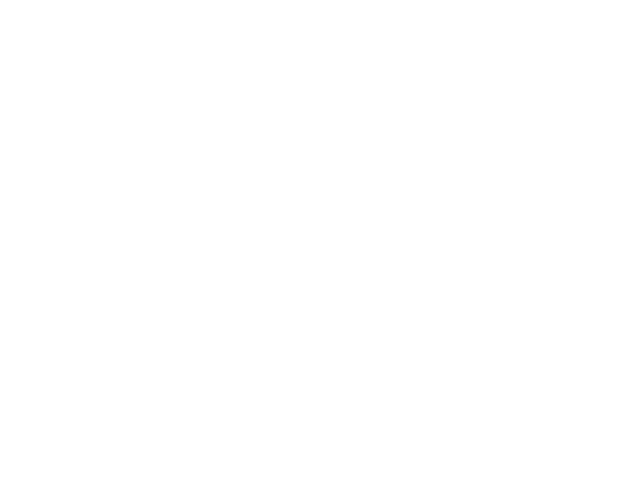

In [25]:
#simple plot test

import matplotlib.pyplot as plt             #https://pythonprogramming.net/matplotlib-3d-scatterplot-tutorial/
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x=[81]
y=[8.1]
z=[22873]
ax.scatter(x,y,z, c='b', marker='^')
ax.set_xlabel('Metascore')
ax.set_ylabel('IMDB Rating')
ax.set_zlabel('IMDB Votes')

<IPython.core.display.Javascript object>


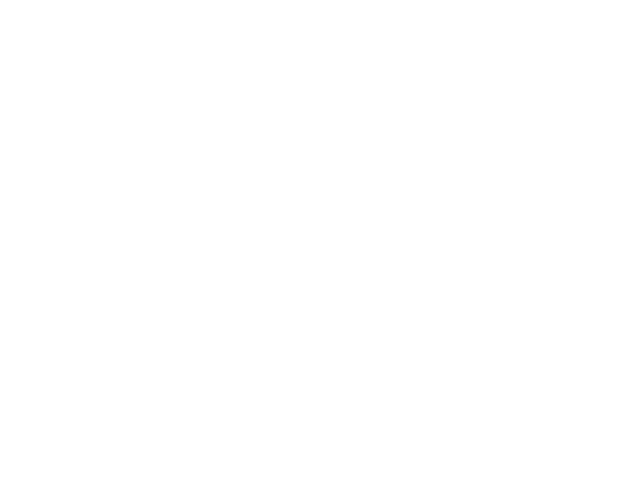

In [26]:
#import matplotlib.pyplot as plt 
#from mpl_toolkits.mplot3d import Axes3D
#import numpy as np
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for movie_title in movies: 
    x = movies[movie_title]['Metascore']
    y = movies[movie_title]['imdbRating']
    z = movies[movie_title]['imdbVote']
    if None in (x, y, z): continue
    ax.scatter(x, y, z, c='b', marker='o')

ax.set_xlabel('Metascore')
ax.set_ylabel('IMDB Rating')
ax.set_zlabel('IMDB Votes')




#### This plot contains good data however for looking at this relationship it isn't particularly clear, as the values are relatively close together it is difficult to distinguish them on the 3D plot. However, the rotating view does help us to see that there is a general trend with IMDB rating increasing with Metascore, but there seems to be little pattern between IMDB votes and either of the ratings. These conclusions are both logical and what would generally be expected.

## Cinema ratings plot

<IPython.core.display.Javascript object>


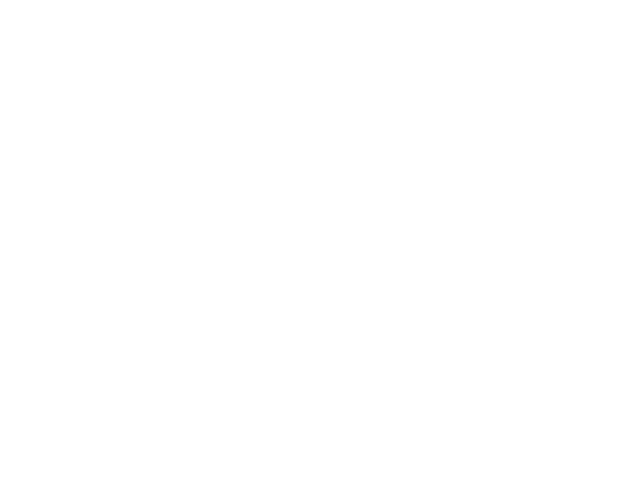

In [27]:
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for movie_title in movies:
    try:
        xs = movies[movie_title]['odeonRating']
        ys = movies[movie_title]['imdbRating']
        zs = 2*(movies[movie_title]['cineRating'])         #this value is doubled to allow for an easier comparison as both the other ratings are out of 10
        if None in (xs, ys, zs): continue
        ax.scatter(xs, ys, zs, c='b', marker='o')
    except: continue

ax.set_xlabel('Odeon Viewer Rating')
ax.set_ylabel('IMDB Rating')
ax.set_zlabel('Cineworld Viewer Rating')


#### Due to the lack of points and style of the data, not much can be determined from this plot, though if rotated it can be seen that there is a general positive corelation between odeon and IMDB ratings. For comparing these three ratings it may be more useful to create a 2D plot.

<IPython.core.display.Javascript object>


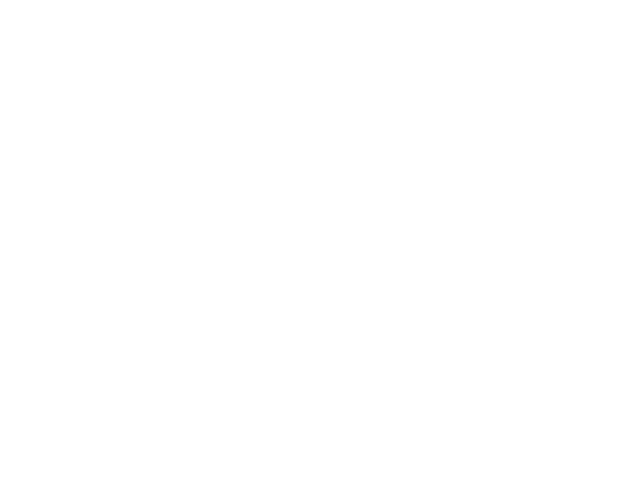

In [28]:
#creating a 2D scatter plot
#import numpy as np
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
for movie_title in movies:
    try:
        y = movies[movie_title]['imdbRating']            #http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html
        x = (movies[movie_title]['Metascore'])/10
        colors = 'y'
        area = np.pi * ((movies[movie_title]['imdbVote'])/2000)**2  # creates radii based on No. of IMDB votes
        ax.scatter(x, y, s=area, c=colors, alpha=0.5)
    except: continue

ax.set_xlim([2,10])                                                 #sets uniform axis length to allow graphs to be compared
ax.set_ylim([2,10.5])
ax.set_ylabel('IMDB Rating')
ax.set_xlabel('Meta score')


#### A slight positive correlation is clearly visible here.

<IPython.core.display.Javascript object>


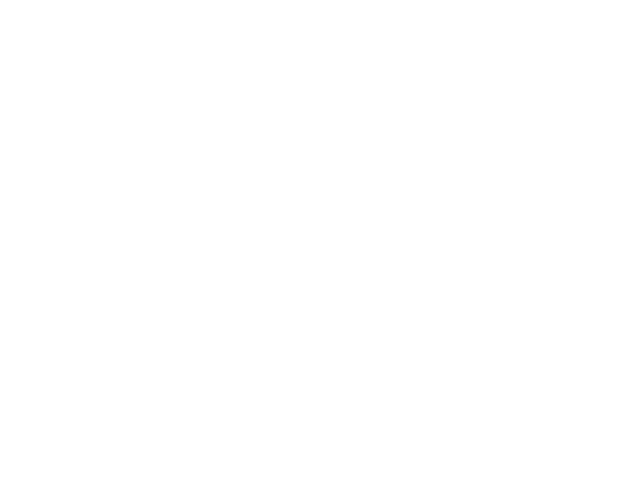

In [29]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
for movie_title in movies:
    try:
        y = movies[movie_title]['odeonRating']
        x = (movies[movie_title]['Metascore'])/10
        colors = 'b'
        area = np.pi * ((movies[movie_title]['imdbVote'])/2000)**2  # creates radii based on No. of IMDB votes
        ax.scatter(x, y, s=area, c=colors, alpha=0.5)
    except: continue

ax.set_xlim([2,10])
ax.set_ylim([2,10.5])
ax.set_ylabel('Odeon Viewer Rating')
ax.set_xlabel('Meta score')

<IPython.core.display.Javascript object>


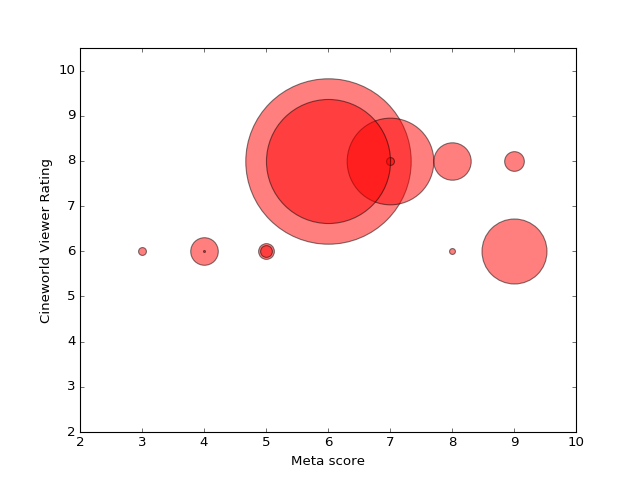

In [30]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
for movie_title in movies:
    try:
        y = (movies[movie_title]['cineRating'])*2 
        x = (movies[movie_title]['Metascore'])/10
        colors = 'r'
        area = np.pi * ((movies[movie_title]['imdbVote'])/2000)**2  # creates radii based on No. of IMDB votes
        ax.scatter(x, y, s=area, c=colors, alpha=0.5)
    except: continue

ax.set_xlim([2,10])
ax.set_ylim([2,10.5])
ax.set_ylabel('Cineworld Viewer Rating')
ax.set_xlabel('Meta score')

#### Due to the limited number of possible values created by the doubling thyis data is not particularly valuable, however there is a definite trend that the films that have had more rating votes on IMDB also have a higher rating from people who have viewed that film at cineworld. More analysis is needed as this could simple point to these being more popular films generally.

<IPython.core.display.Javascript object>


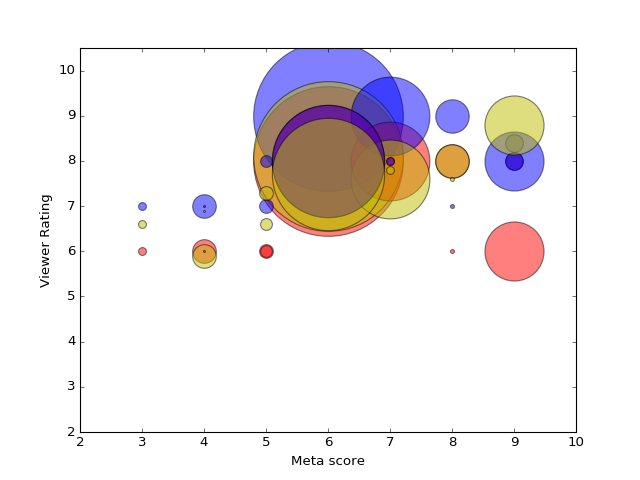

In [31]:
#combining the four plots above
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
for movie_title in movies:
    try:
        #cineworld ratings
        yc = (movies[movie_title]['cineRating'])*2 
        xc = (movies[movie_title]['Metascore'])/10
        colors = 'r'
        area = np.pi * ((movies[movie_title]['imdbVote'])/2200)**2  # creates radii based on No. of IMDB votes
        ax.scatter(xc, yc, s=area, c=colors, alpha=0.5)
        #odeon ratings
        yo = movies[movie_title]['odeonRating'] 
        xo = (movies[movie_title]['Metascore'])/10
        colors = 'b'
        area = np.pi * ((movies[movie_title]['imdbVote'])/2200)**2  # creates radii based on No. of IMDB votes
        ax.scatter(xo, yo, s=area, c=colors, alpha=0.5)
        #imdb ratings
        yi = movies[movie_title]['imdbRating'] #http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html
        xi = (movies[movie_title]['Metascore'])/10
        colors = 'y'
        area = np.pi * ((movies[movie_title]['imdbVote'])/2200)**2  # creates radii based on No. of IMDB votes
        ax.scatter(xi, yi, s=area, c=colors, alpha=0.5)
    except: continue

ax.set_xlim([2,10])
ax.set_ylim([2,10.5])
ax.set_ylabel('Viewer Rating')
ax.set_xlabel('Meta score') 


#### From the graphs above and particularly the combined graph we can see certain trends. The movies with a mid range critics score(metascore) are the ones which have attract the most attention and opinion from the public, as they have had the highest number of rating votes from the general public. This public group will include a mix of people who have experienced the film in a cinema environment alongside those who have viewed the film in various other environments. Because of this, the imdb rating and vote can provide a public average or besis to compare other ratings against. On the other hand, the metascore is a collective film critics rating, this therefore gives a base for the quality of the film itself when removing public opinion. Comparing ratingswith this value could also offer some insight into the general public view experience.
#### From the graph above we can also see that generally films when viewd at an odeon cinema are rated higher.

<IPython.core.display.Javascript object>


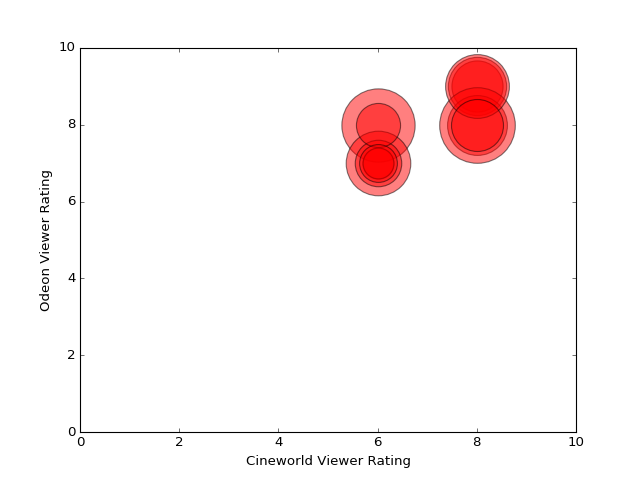

In [32]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
for movie_title in movies:
    try:
        x = (movies[movie_title]['cineRating'])*2
        y = movies[movie_title]['odeonRating']
        colors = 'r'
        area = np.pi * ((movies[movie_title]['Metascore'])/2.5)**2  # creates radii based on the critics rating
        ax.scatter(x, y, s=area, c=colors, alpha=0.5)
    except: continue
ax.set_xlim([0,10])
ax.set_ylim([0,10])
ax.set_xlabel('Cineworld Viewer Rating')
ax.set_ylabel('Odeon Viewer Rating')

#### This is not particularly helpful as the range of points is so low the points simply overlap, also comparing these two directly in this way it is more difficult to see the trend discovered in the previous plot.

In [38]:
#barchart plot adapted from http://matplotlib.org/examples/api/barchart_demo.html
import math                                              #to facilitate log function of IMDB vote values
%matplotlib notebook 
fig = plt.figure()
ax = fig.add_subplot(111)
width = 0.2                                              # the width of the bars
    
ind = np.arange(len(movies))                             # the x locations for the groups spaced equally for the number of films

imdb_ratings = [  movies[movie_title]['imdbRating'] for movie_title in movies ]
odeon_ratings = [  movies[movie_title]['odeonRating'] for movie_title in movies ]
cine_ratings = [  (movies[movie_title]['cineRating'])*2 for movie_title in movies ]
imdb_votes = [  (math.log(movies[movie_title]['imdbVote']))/25 for movie_title in movies ]  #log of votes used instead as the original range of sizes was too large

imdb = ax.bar(ind-width, imdb_ratings, width=width, color=(0.8,0.7,0.1), label='IMDB', yerr=imdb_votes)                
imdb = ax.bar(ind-imdb_votes, imdb_ratings, width=imdb_votes, color=(0.8,0.7,0.1) , label='IMDB')  #width of bar proportional to no of votes
odeon = ax.bar(ind+width, odeon_ratings, width=width, color=(0.08,0.1,0.4) , label= 'Odeon')       #colours chosen based on branding colours to help with recognition
cine = ax.bar(ind, cine_ratings, width=width, color=(0.8,0.12,0.01) , label= 'Cineworld')

ax.set_ylim([0,10])

# add some text for labels, title and axes ticks
ax.set_ylabel('Rating')
ax.set_xticks(ind + width / 2)                           # sets marker(tick) the the center of the center bars
ax.set_xticklabels(get_movie_names(),rotation=45,horizontalalignment='right') #alters position and orientation of film labels so they can be easily read
ax.legend(loc='center left', bbox_to_anchor=(0.85, 0.9), fontsize = 8)        #http://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
ax.set_title('Film Ratings')
fig.tight_layout()

![Image](https://cloud.githubusercontent.com/assets/22890907/22428338/95ec9510-e6fe-11e6-95f8-cf74085f8097.png)

#### This plot although very simple is helpful in pointing out a couple of key patterns. First, the odeon rating for a film is always higher than cineworld, this could either point to the fact that the viewing experience is better at odeon or that the consumer odeon attracts is more easily pleased. Second, in general the variation between different ratings is small, showing that the impact viewing experience is finite. Finally, it can clearly seen the for over half the films the Odeon rating is similar to the general average(IMDB) and that the cineworld rating is significantly lower, this points to cineworld having an inferior viewing experience.

<IPython.core.display.Javascript object>


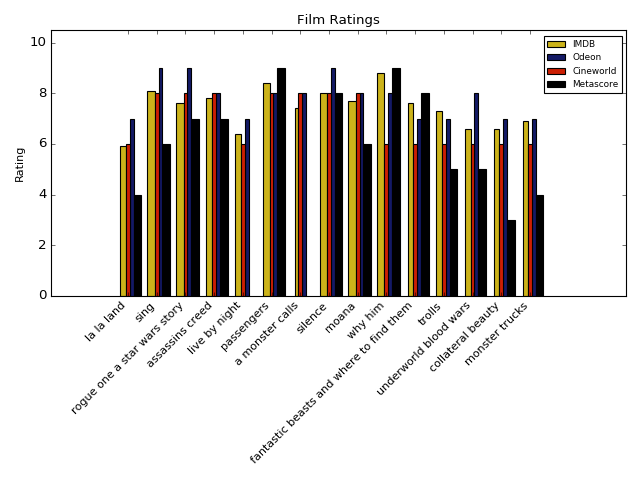

In [585]:
#repeat the above but add in metascore data to give a better comparison
#import math
%matplotlib notebook 
fig = plt.figure()
ax = fig.add_subplot(111)
#fig, ax = plt.subplots()
width = 0.4                    
    
ind = np.arange(len(movies))  

imdb_ratings = [  movies[movie_title]['imdbRating'] for movie_title in movies ]
odeon_ratings = [  movies[movie_title]['odeonRating'] for movie_title in movies ]
cine_ratings = [  2*movies[movie_title]['cineRating'] for movie_title in movies ]
imdb_votes = [  (math.log(movies[movie_title]['imdbVote']))/15 for movie_title in movies ]  #log of votes used instead as the original range of sizes was too large
meta_score = [
    movies[movie_title]['Metascore'] / 10
    if movies[movie_title]['Metascore'] is not None else   #loops through to check there is a plottable value, if not it with 'nan' which is not a value but is still plottable
    float('nan')
    for movie_title in movies ]

    
#print meta_score
#imdb = ax.bar(ind-width, imdb_ratings, width=width, color=(0.8,0.7,0.1), label='IMDB', yerr=imdb_votes)                
imdb = ax.bar(3*ind-imdb_votes, imdb_ratings, width=imdb_votes, color=(0.8,0.7,0.1) , label='IMDB')  #positioning '*1.5' to make the bars more spread out to accomodate another bar while remaining easy to read
odeon = ax.bar(3*ind+width, odeon_ratings, width=width, color=(0.08,0.1,0.4) , label= 'Odeon')
cine = ax.bar(3*ind, cine_ratings, width=width, color=(0.8,0.12,0.01) , label= 'Cineworld')
meta = ax.bar(3*ind+2*width, meta_score, width=2*width, color='k' , label= 'Metascore')

ax.set_ylim([0,10.5])

# add some text for labels, title and axes ticks
ax.set_ylabel('Rating', fontsize = 10)
ax.set_xticks(3*ind + width / 2)
ax.set_xticklabels(get_movie_names(),rotation=45,horizontalalignment='right',fontsize = 10)
ax.legend(loc='center left', bbox_to_anchor=(0.85, 0.87), fontsize = 8)       #http://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
ax.set_title('Film Ratings', fontsize=12)
fig.tight_layout()

![Image](https://cloud.githubusercontent.com/assets/22890907/22428339/95edd0d8-e6fe-11e6-8cb3-d82f402a3678.png)

#### By adding in the critics rating it highlights the variation between the critics rating and the publics, showing that the IMDB rating is  a much better representation of average viewing experience.

# Word clouds

#### First we need to process the text, starting with the odeon review text as this is already partially formtted, removing common words and any remaining punctuation and then plotting in a word cloud.

## Odeon reviews text data

In [39]:
#print odeon_reviews
type(odeon_reviews)


#method of converting from unicode format no longer needed

#import unicodedata                                 #http://stackoverflow.com/questions/1207457/convert-a-unicode-string-to-a-string-in-python-containing-extra-symbols
#reviews = []
#for t in odeon_reviews:
#    raw_text = t
#    w = unicodedata.normalize('NFKD', raw_text).encode('ascii','ignore')
#    reviews.append(w)
#print reviews
#len(odeon_reviews) #[o.encode('utf8') for o in odeon_reviews]

list

In [40]:
from nltk.corpus import stopwords                  #http://stackoverflow.com/questions/9953619/technique-to-remove-common-wordsand-their-plural-versions-from-a-string
s=stopwords.words('english')

#the stopwords are removed in the second version of the wordcloud process so this section is unnecessary
#review_text=[]        
#print s
#for w in odeon_reviews:
#    #print w
#    for key in s:
#        if key not in w:
#            review_text.append(w)
#        else:
#            continue

#print review_text 

<IPython.core.display.Javascript object>


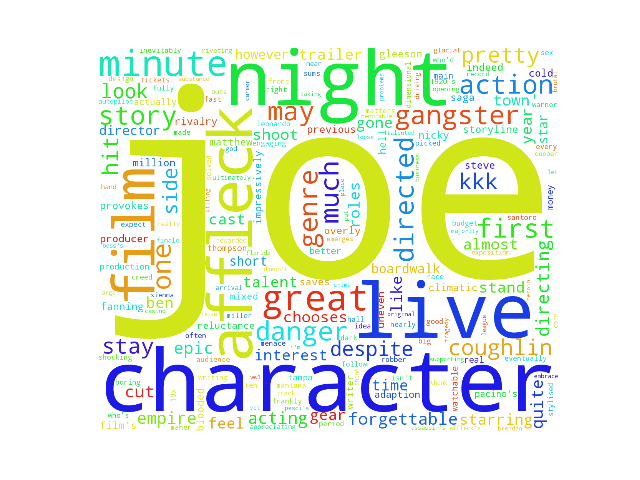

In [47]:
from wordcloud import WordCloud                         #https://github.com/amueller/word_cloud/blob/master/examples/simple.py
#import matplotlib.pyplot as plt
%matplotlib notebook
s=stopwords.words('english')                            #call in a list of common english words which don't hold any meaning in this form of analysis

#replaced by line below
#all_words = [
#    word
#    for word in odeon_reviews
#    ]
#print odeon_reviews
#all_words=[]
#for word in odeon_reviews:
#    #print word
#    all_words += 'word'
#word odeon_reviews.readlines()                                                                            
all_words = " ".join(odeon_reviews)                     #joins all the words in the list together as a single string which is the input format required for word cloud
    
#print all_words

#https://discuss.analyticsvidhya.com/t/how-can-i-create-word-cloud-in-python/969/2
wordcloud = WordCloud(#font_path='/Users/kunal/Library/Fonts/sans-serif.ttf',  #generates wordcloud plot
                          stopwords=s,
                          background_color='white',
                          width=1200,                   #sets plot proportions
                          height=1000
                         ).generate(all_words)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### There are clearly some common words in this which hold no particular relevance to the view experience and therefore it would be more beneficial to remove these.

In [48]:
import re
words=all_words.replace('joe', '').replace('affleck', '').replace('kkk', '').replace('film', '').replace('minute', '').replace('coughlin', '').replace('gangster', '')  #replacing random meaningless words

<IPython.core.display.Javascript object>


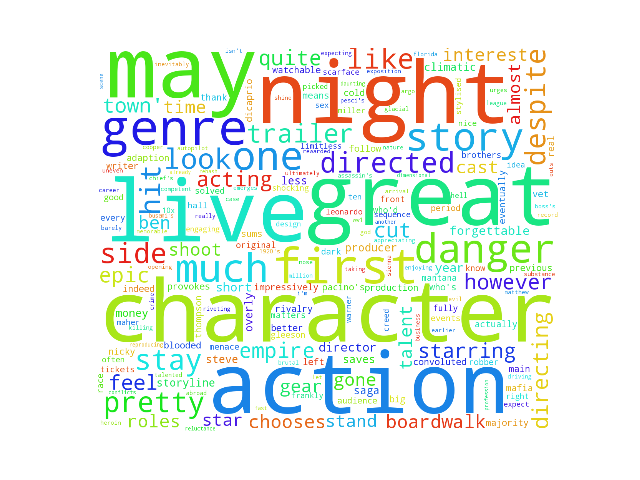

In [49]:
#repeated from above 
%matplotlib notebook
s=stopwords.words('english')

wordcloud = WordCloud(    stopwords=s,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(words)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### This highlights viewer main thoughts after seeing a film at an odeon cinema, which in isolation does not really help in answering our initial questions. Though it does show a general positive reation to the odeon viewing experience, with one of the most common words being 'great'.

## Tweet text data

#### Need to process and format text from tweets, removing user names and creating one large string or text file, which can then be plotted in a word cloud.

In [51]:
tweet_text = []
with open("tweetsf.txt", "r") as source:             #converts input txt file into a set of variables, which is easier to work with
    for line in source:
        line = line.rstrip("\n")
        
        if not line: continue
        line = json.loads(line)
        tweet_text.append(line)  
#print tweet_text

tweet_text_flat = []
for tweets in tweet_text:
    for tweet in tweets:
        tweet_text_flat.append(tweet)                #flattens text in to one list
       
#print tweet_text_flat

In [52]:
def text_clean(source):                                #function to clean up the text and remove unwanted charaters and items such as twitter handles 
    from nltk.corpus import stopwords 
    import string
    import re
    import translate
    #import goslate
    clean_text=[]
    stopwords=stopwords.words('english')
    for line in source:                               
        line = line.replace('&amp;', ' & ')
        line = line.lower()
        for k in key_words:
            line = line.replace(k, ' ')
        for word in line.split():
            if word.startswith("http"): continue  
            word = re.sub(ur"\p{P}+", "", word)         #removes common punctuation #http://stackoverflow.com/a/11066687/102441
            word = re.sub('[)/:",.#!\\(]', '', word)    #removes specific characters
            #word = word.replace(')','').replace('/', '')\ #replaced by the line above
            #    .replace(':', '').replace('"', '').replace(',', '').replace('.', '')\
            #    .replace('(','').replace('\\','')
            #print word
            if word.startswith("@"): continue           #removes all twitter handles
                
            clean_text.append(word)
        
    return clean_text


In [53]:
clean_text = text_clean(tweet_text_flat)              #runs above function for tweet data
#print clean_text
ctext=" ".join(clean_text)                            #coverts list of words returned from function in to one continuous string
#print ctext

<IPython.core.display.Javascript object>


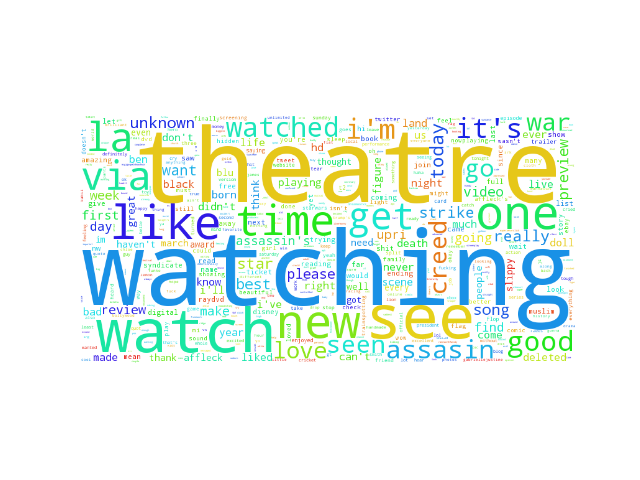

In [54]:
#Plots word cloud as before
%matplotlib notebook
s=stopwords.words('english')


wordcloud = WordCloud(    stopwords=s,
                          background_color='white',
                          width=800,
                          height=400,
                          max_words=500
                         ).generate(ctext)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()


#### This contains many words which have a strong link with the original project questions but do not contribute to answering them and therefore are unhelpful.

In [55]:
#Replaces function above with the addition of removing specific unhelpful words
def text_clean(source): 
    from nltk.corpus import stopwords 
    import string
    import re
    import translate
    #import goslate
    clean_text=[]
    stopwords=stopwords.words('english')
    for line in source:                 #http://stackoverflow.com/questions/265960/best-way-to-strip-punctuation-from-a-string-in-python
        line = line.replace('&amp;', ' & ')
        line = line.lower()
        for k in key_words:
            line = line.replace(k, ' ')
        for word in line.split():
            if word.startswith("watch"): continue
            if word.startswith("theatre"): continue
            if word.startswith("see"): continue
            if word.startswith("assasin"): continue
            if word.startswith("creed"): continue
            if word.startswith("i'm"): continue
            if word.startswith("it's"): continue
            if word.startswith("la"): continue
            if word.startswith("via"): continue
            if word.startswith("affleck"): continue
            if word.startswith("http"): continue 
            if word.startswith("like"): continue
            word = re.sub(ur"\p{P}+", "", word)    #removes common punctuation #http://stackoverflow.com/a/11066687/102441
            word = re.sub('[)/:",.#!]', '', word)       #removes specific characters
            word = word.replace(')','').replace('/', '')\
                .replace(':', '').replace('"', '').replace(',', '').replace('.', '')\
                .replace('(','').replace('\\','')
            #if word in key_words: continue
            #print word
            if word.startswith("@"): continue      #removes all twitter handles
                
            clean_text.append(word)
        
    return clean_text

<IPython.core.display.Javascript object>


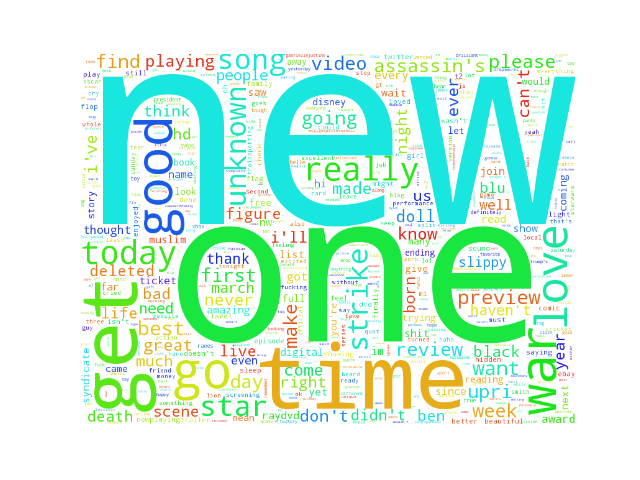

In [56]:
#Repeated as before
clean_text = text_clean(tweet_text_flat)
ctext=" ".join(clean_text)

%matplotlib notebook
s=stopwords.words('english')
wordcloud = WordCloud(    stopwords=s,
                          background_color='white',
                          width=800,
                          height=600,
                          max_words=500
                         ).generate(ctext)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### This it less reliable than the privous data analysed, as it is likely that some of the tweets collected, although they contain a reference to films or cinemas, do not comment on the viewing experience. However, if we keep that in mind this output can still tell us something about film experience in general, it shows a general positivity and excitement towards films.

#### The word data collected has not been as helpful in providing answers, this is due to the difficulty in comparing it. I feel it would be useful to plot an integrated wordcloud containing both sets of text data, distingushed with colours, as this would help to make this direct comparison. However, I was unable to find any resources to offer examples or guidance on this and therefore was unable to produce it.

#### In relation to the initial questions there are two main findings. First, that the impact of viewing experience is finite, and that film content plays a larger part in the viewers overall opinion of the experience. It is clear from the close correlation of ratings across different viewing locations that these ratings refer to the film, therefore the impact of the viewing experience will always be finite. Nevertheless, although relatively small there has been clear variation in the results, with patterns within this variation showing that the viewing experience does factor to some extent in the rating given. Second, the patterns in the variation clearly show films viewed at Odeon cinemas, to have higher ratings given by viewers. As mentioned previously, this will be influenced by the type of consumer Odeon attracts, it is not clear to what extent their standard for film viewing will have influenced this. However, it has also been noted that for the majority of films considered, the Odeon rating is closest to that given on IMDB(considered the public average rating) with the cineworld rating being considerably lower in these cases.
#### The main aim of this project was to inform a project on cinema hall environment design, from this analysis I have concluded that although the impact of viewing experience in the average cinema is finite, Odeon in the majority of case provides the better viewing experience of the two chains consider and therefore research into their cinema hall environment, would be beneficial in providing a good design basis.
